In [1]:
%pylab inline
from wallet.util.analysis import Analysis
categories = ['Alternatives', 'Commodities',
              'Equities Foreign', 'Equities Domestic Mid-Cap', 'Equities Domestic Small-Cap',
              'Bonds Foreign', 'Bonds Domestic Corporate', 'Bonds Domestic Municipal']
previous = ['USRT','IAU']
ana = Analysis.from_funds(50, categories=categories, additions=previous)
print(ana)
ana.screen().head(20)

Populating the interactive namespace from numpy and matplotlib
from 2019-09-13 to 2019-11-29 - 164 symbols


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Symbols,,,,,,,,,,,,
EWT,50.0,0.175319,0.290983,-0.461570,-0.035710,0.193737,0.384887,0.795610,0.575231,7.728023,2.351487,-0.010111
REM,50.0,0.106335,0.184851,-0.318866,-0.023813,0.122254,0.219661,0.472077,0.532314,6.473947,1.825078,-0.157178
SCZ,50.0,0.119037,0.244429,-0.389242,-0.026080,0.109170,0.241948,0.830589,0.454531,5.791573,3.034507,0.607194
BBJP,50.0,0.104082,0.212719,-0.495757,-0.024964,0.096188,0.228819,0.598955,0.451984,4.623785,2.749999,-0.419581
EWJ,50.0,0.102563,0.215142,-0.496112,-0.020063,0.081202,0.223940,0.607667,0.439831,4.501497,2.635250,-0.303896
VIGI,50.0,0.104540,0.236731,-0.452734,-0.052934,0.086049,0.253132,0.634978,0.408075,4.437508,3.116145,-0.197529
EFAV,50.0,0.063357,0.147707,-0.365799,-0.014022,0.078656,0.145095,0.347328,0.375206,2.789173,2.228866,-0.566089
DXJ,50.0,0.141560,0.357741,-0.689298,-0.108058,0.130961,0.383317,1.144294,0.373519,6.719408,3.534955,0.155797
DLS,50.0,0.115477,0.292885,-0.394048,-0.094447,0.094132,0.264835,0.960930,0.367176,5.562496,3.882595,0.638476


In [2]:
print(ana)
ratios, ratio = ana.optimize_iteration(3, additions=previous)
ratios

from 2019-09-13 to 2019-11-29 - 137 symbols


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1806: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1807: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


[(-0.2021, {'IAU': 1}),
 (0.0438, {'USRT': 1}),
 (0.244, {'HYD': 1}),
 (0.2552, {'SPIB': 1}),
 (0.3862, {'IDV': 0.5027, 'INDA': 0.4973}),
 (0.447, {'VIGI': 0.4478, 'RWX': 0.3365, 'IWP': 0.2157}),
 (0.4492, {'VIGI': 0.3757, 'IWP': 0.3604, 'INDA': 0.2639}),
 (0.4841, {'RWX': 0.318, 'EWJ': 0.682}),
 (0.5207, {'ITM': 0.5771, 'EWJ': 0.4229}),
 (0.5561, {'ITM': 0.7241, 'DLS': 0.2759}),
 (0.5681, {'MUB': 0.6456, 'BBJP': 0.3544}),
 (0.5959, {'REM': 0.4528, 'VTEB': 0.5472}),
 (0.598, {'IDV': 0.2057, 'CMF': 0.7943}),
 (0.6915, {'LQD': 0.2612, 'DLS': 0.2778, 'PZA': 0.461}),
 (0.6985, {'USIG': 0.4397, 'PZA': 0.2142, 'SCZ': 0.3461}),
 (0.7077, {'USIG': 0.384, 'CMF': 0.2923, 'SCZ': 0.3237}),
 (0.7914, {'HEFA': 0.2972, 'VCIT': 0.7028}),
 (0.7938, {'IGIB': 0.7088, 'HEFA': 0.2912}),
 (0.9458, {'EWT': 0.2407, 'NUV': 0.35, 'SPIB': 0.4093}),
 (0.9513, {'LQD': 0.2764, 'NUV': 0.4244, 'EWT': 0.2992}),
 (0.9869, {'IGIB': 0.7701, 'DXJ': 0.2299}),
 (0.9919, {'DXJ': 0.2339, 'VCIT': 0.7661})]

{'DXJ': 8, 'VCIT': 26, 'LQD': 9, 'NUV': 14, 'EWT': 10, 'IGIB': 24, 'HEFA': 10}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Portfolio,50.0,0.066294,0.055240,-0.070505,3.067719e-02,0.073318,0.102365,0.158861,1.056423,3.488893,0.457721,-0.465549
EWT,50.0,0.175319,0.290983,-0.461570,-3.570997e-02,0.193737,0.384887,0.795610,0.575231,7.728023,2.351487,-0.010111
DXJ,50.0,0.141560,0.357741,-0.689298,-1.080584e-01,0.130961,0.383317,1.144294,0.373519,6.719408,3.534955,0.155797
NUV,50.0,0.049562,0.115553,-0.287301,-8.326673e-15,0.047753,0.095596,0.349110,0.360228,3.144742,1.427211,0.147125
HEFA,50.0,0.088540,0.255517,-0.526422,-5.321409e-02,0.095316,0.265653,0.711816,0.315452,4.008012,3.239817,-0.311599
LQD,50.0,0.048757,0.141832,-0.281072,-2.205599e-02,0.058254,0.140321,0.396586,0.287810,3.245195,1.730320,-0.255370
IGIB,50.0,0.035676,0.102508,-0.210035,-2.595605e-03,0.053535,0.100537,0.203815,0.270605,2.157451,1.099047,-0.600612
VCIT,50.0,0.035001,0.105136,-0.204621,-1.207666e-02,0.048155,0.091308,0.228033,0.257421,2.163486,1.214299,-0.507678


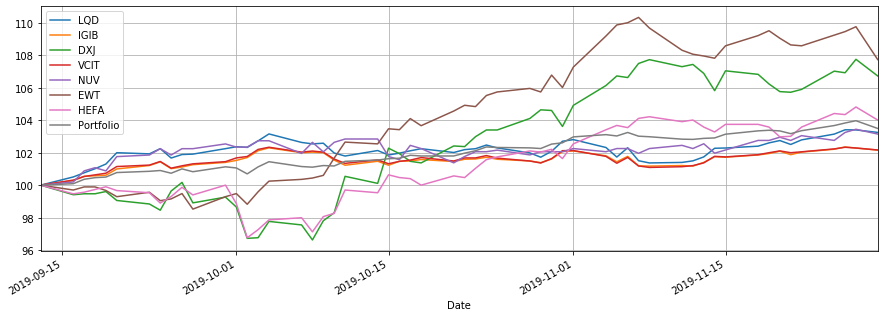

In [3]:
print(ratio)
ana.graph(ratio)